In [66]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import glob
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import thor.data as data
import thor.attribute as attribute

import thor.config as config

notebook_name = "gridrad_demo.ipynb"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
# Aggregate data across runs

base_local = config.get_outputs_directory()
run_directories = sorted(glob.glob(str(base_local / "runs/gridrad_severe/gridrad_2010*[!.tar.gz]")))

names = ["core", "group", "classification", "quality"]
subdirectories = ["attributes/mcs", "attributes/mcs", "analysis", "analysis"]

dfs = {}

for i, name in enumerate(names):
    df_list = []
    for directory in run_directories:        
        options_filepath = Path(directory) / "options/data.yml"
        with open(options_filepath, "r") as f:
            data_options = data.option.DataOptions(**yaml.safe_load(f))
        gridrad_options = data_options.dataset_by_name("gridrad")
        event_start = gridrad_options.event_start
        
        filepath = Path(directory) / subdirectories[i] / f"{name}.csv"
        df = attribute.utils.read_attribute_csv(filepath)
        df["event_start"] = event_start
        df_list.append(df)
    df = pd.concat(df_list)
    df = df.reset_index().set_index(["time", "universal_id", "event_start"])
    dfs[name] = df

2024-11-04 13:03:03,712 - thor.data.option - INFO - Assigning default era5 pressure levels.
2024-11-04 13:03:03,837 - thor.data.option - INFO - Assigning default era5 pressure levels.
2024-11-04 13:03:03,974 - thor.data.option - INFO - Assigning default era5 pressure levels.
2024-11-04 13:03:04,096 - thor.data.option - INFO - Assigning default era5 pressure levels.
2024-11-04 13:03:04,222 - thor.data.option - INFO - Assigning default era5 pressure levels.
2024-11-04 13:03:04,359 - thor.data.option - INFO - Assigning default era5 pressure levels.
2024-11-04 13:03:04,482 - thor.data.option - INFO - Assigning default era5 pressure levels.
2024-11-04 13:03:04,615 - thor.data.option - INFO - Assigning default era5 pressure levels.
2024-11-04 13:03:04,769 - thor.data.option - INFO - Assigning default era5 pressure levels.
2024-11-04 13:03:04,882 - thor.data.option - INFO - Assigning default era5 pressure levels.
2024-11-04 13:03:05,024 - thor.data.option - INFO - Assigning default era5 press

(array([2818.,    0.,    0.,    0.,    0., 2853.,    0.,    0.,    0.,
         170.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

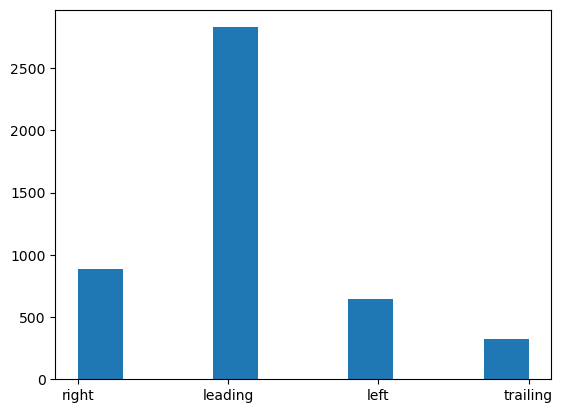

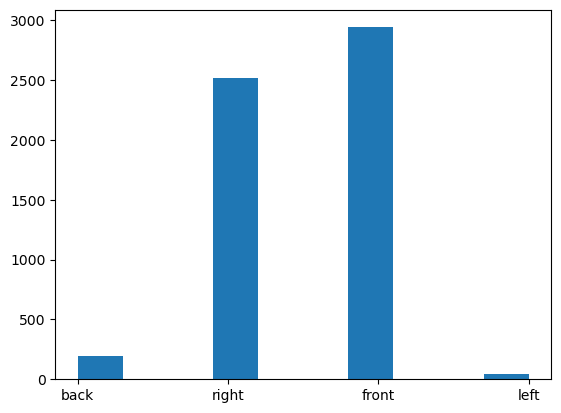

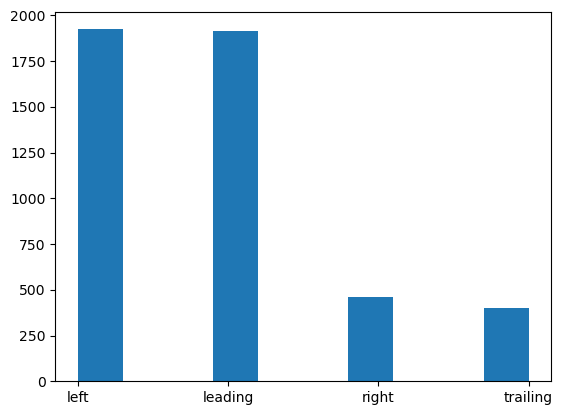

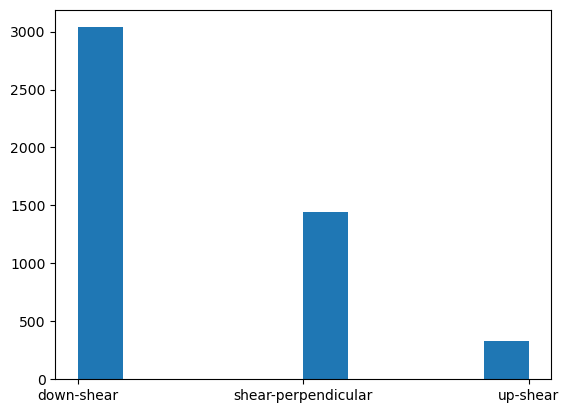

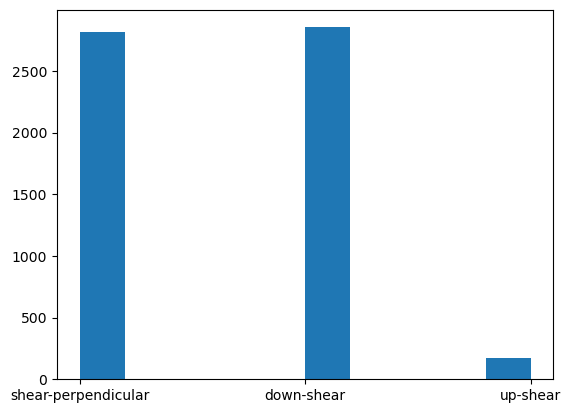

In [69]:
quality = dfs["quality"]
classification = dfs["classification"]
raw_sample = quality[["duration", "parents"]].any(axis=1)

names = ["convective_contained", "anvil_contained", "velocity", "offset"]
stratiform_offset_sample = raw_sample & quality[names].all(axis=1)
fig, ax = plt.subplots()
ax.hist(classification["stratiform_offset"].where(stratiform_offset_sample).dropna().values)

names = ["convective_contained", "anvil_contained", "velocity", "relative_velocity"]
inflow_sample = raw_sample & quality[names].all(axis=1)
fig, ax = plt.subplots()
ax.hist(classification["inflow"].where(inflow_sample).dropna().values)

names = ["convective_contained", "anvil_contained", "relative_velocity", "offset"]
relative_stratiform_offset_sample = raw_sample & quality[names].all(axis=1)
fig, ax = plt.subplots()
ax.hist(classification["relative_stratiform_offset"].where(relative_stratiform_offset_sample).dropna().values)

names = ["convective_contained", "anvil_contained", "shear", "offset"]
shear_sample = raw_sample & quality[names].all(axis=1)
fig, ax = plt.subplots()
ax.hist(classification["tilt"].where(shear_sample).dropna().values)

names = ["convective_contained", "anvil_contained", "shear", "relative_velocity"]
propagation_sample = raw_sample & quality[names].all(axis=1)
fig, ax = plt.subplots()
ax.hist(classification["propagation"].where(propagation_sample).dropna().values)